# Proyek Analisis Data: Analisis Tren Penjualan dan Kepuasan Pelanggan pada Olist E-Commerce
- **Nama:** Calvin Mahardika
- **Email:** calvinmahardika@gmail.com
- **ID Dicoding:** calvin_mahardika

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa saja 10 kategori produk yang menghasilkan total pendapatan (revenue) tertinggi selama seluruh periode transaksi tahun 2016-2018?
- Pertanyaan 2: Bagaimana tren rata-rata skor ulasan bulanan dari pelanggan di tahun 2018, dan kategori produk mana yang memiliki rata-rata rating terendah pada tahun tersebut?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan file-file ini berada di dalam folder bernama 'data'
customers_df = pd.read_csv("data/customers_dataset.csv")
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orders_df = pd.read_csv("data/orders_dataset.csv")
product_category_df = pd.read_csv("data/product_category_name_translation.csv")
products_df = pd.read_csv("data/products_dataset.csv")
sellers_df = pd.read_csv("data/sellers_dataset.csv")

## Data Wrangling

### Gathering Data

In [ ]:
# Tentukan path dengan nama folder yang benar
path = "/content/drive/MyDrive/project_dicoding/"

# Memuat ke-9 dataset
customers_df = pd.read_csv(path + "customers_dataset.csv")
geolocation_df = pd.read_csv(path + "geolocation_dataset.csv")
order_items_df = pd.read_csv(path + "order_items_dataset.csv")
order_payments_df = pd.read_csv(path + "order_payments_dataset.csv")
order_reviews_df = pd.read_csv(path + "order_reviews_dataset.csv")
orders_df = pd.read_csv(path + "orders_dataset.csv")
product_category_df = pd.read_csv(path + "product_category_name_translation.csv")
products_df = pd.read_csv(path + "products_dataset.csv")
sellers_df = pd.read_csv(path + "sellers_dataset.csv")

print("Berhasil! Seluruh data dari folder project_dicoding telah dimuat.")

# Cek 5 data teratas dari salah satu tabel untuk memastikan
orders_df.head()

Berhasil! Seluruh data dari folder project_dicoding telah dimuat.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

In [ ]:
# Cek apakah ada data yang kosong (Null) di setiap tabel
print("--- Mengecek Missing Values ---")
print(orders_df.isna().sum())

# Cek apakah ada data yang kembar (Duplicate)
print("\n--- Mengecek Duplikat ---")
print(f"Jumlah duplikat orders: {orders_df.duplicated().sum()}")

# Cek ringkasan rating pelanggan
print("\n--- Distribusi Rating Pelanggan ---")
print(order_reviews_df['review_score'].value_counts())

--- Mengecek Missing Values ---
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

--- Mengecek Duplikat ---
Jumlah duplikat orders: 0

--- Distribusi Rating Pelanggan ---
review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64


**Insight:**
- Masih terdapat missing value pada kolom order_delivered_customer_date sebanyak 2.965 data. Hal ini kemungkinan menunjukkan adanya pesanan yang belum sampai ke pelanggan atau tidak terselesaikan. Selain itu, kolom-kolom yang berkaitan dengan waktu masih bertipe object, sehingga perlu dikonversi ke tipe datetime agar analisis tren waktu dapat dilakukan dengan lebih akurat.
- Dari distribusi ulasan pelanggan, terlihat bahwa mayoritas pelanggan memberikan skor 5 dengan total 57.328 ulasan. Namun, jumlah ulasan dengan skor 1 juga cukup besar, yaitu 11.424 ulasan. Hal ini mengindikasikan adanya permasalahan pada kepuasan pelanggan di transaksi tertentu, yang perlu ditelusuri lebih lanjut, misalnya berdasarkan kategori produk.

### Cleaning Data

In [ ]:
# 1. Konversi kolom tanggal (Penting agar Time-bound bisa dihitung)
datetime_columns = ["order_purchase_timestamp", "order_delivered_customer_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

# 2. Menggabungkan tabel (Merge)
# Hubungkan orders -> items -> products -> translation -> reviews
main_df = pd.merge(orders_df, order_items_df, on="order_id", how="left")
main_df = pd.merge(main_df, products_df, on="product_id", how="left")
main_df = pd.merge(main_df, product_category_df, on="product_category_name", how="left")
main_df = pd.merge(main_df, order_reviews_df, on="order_id", how="left")

# 3. Menghapus kolom kategori bahasa portugis agar rapi
main_df.drop(columns=['product_category_name'], inplace=True)

# 4. Filter data hanya yang sukses (delivered) agar analisis revenue akurat
main_df = main_df[main_df['order_status'] == 'delivered']

print("Cleaning Selesai! Data siap dianalisis untuk menjawab pertanyaan SMART.")
main_df.info()

Cleaning Selesai! Data siap dianalisis untuk menjawab pertanyaan SMART.
<class 'pandas.core.frame.DataFrame'>
Index: 110840 entries, 0 to 114091
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110840 non-null  object        
 1   customer_id                    110840 non-null  object        
 2   order_status                   110840 non-null  object        
 3   order_purchase_timestamp       110840 non-null  datetime64[ns]
 4   order_approved_at              110825 non-null  object        
 5   order_delivered_carrier_date   110838 non-null  object        
 6   order_delivered_customer_date  110832 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110840 non-null  object        
 8   order_item_id                  110840 non-null  float64       
 9   product_id                     110840 non-null  object        
 10  s

**Insight:**
- Semua tabel utama, yaitu orders, items, products, categories, dan reviews, telah digabungkan ke dalam satu DataFrame bernama main_df. Penggabungan ini dilakukan agar hubungan antara harga produk, kategori produk, dan skor ulasan pelanggan dapat dianalisis secara bersamaan.
- Tipe data pada kolom tanggal juga telah diperbaiki menjadi datetime sehingga memungkinkan dilakukan analisis tren waktu. Selain itu, data difilter dengan hanya menyertakan pesanan berstatus delivered, agar analisis pendapatan (revenue) dan kepuasan pelanggan benar-benar merepresentasikan transaksi yang telah selesai.

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
# =========================================================
# BAGIAN 1: MEMBUAT MAIN_DF (MENGGABUNGKAN TABEL)
# =========================================================
# Gabungkan tabel agar kita punya data kategori, harga, dan rating dalam satu tempat
items_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    on="product_id"
)

items_products_translated_df = pd.merge(
    left=items_products_df,
    right=product_category_df,
    how="left",
    on="product_category_name"
)

main_df = pd.merge(
    left=items_products_translated_df,
    right=order_reviews_df,
    how="left",
    on="order_id"
)

# =========================================================
# BAGIAN 2: EKSPLORASI (KODE KAMU + TAMBAHAN)
# =========================================================

# 1. Eksplorasi Pendapatan per Kategori
category_revenue_df = main_df.groupby("product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False).reset_index()
category_revenue_df.rename(columns={"order_id": "total_orders", "price": "total_revenue"}, inplace=True)

# 2. Eksplorasi Rating per Kategori (Min. 50 pesanan agar valid)
category_rating_df = main_df.groupby("product_category_name_english").agg({
    "review_score": "mean",
    "order_id": "nunique"
}).sort_values(by="review_score", ascending=True).reset_index()
low_rated_filtered = category_rating_df[category_rating_df['order_id'] > 50]

# 3. Eksplorasi Geografi (Saran Reviewer)
geo_analysis_df = pd.merge(left=orders_df, right=customers_df, how="left", on="customer_id")
state_orders = geo_analysis_df.groupby("customer_state").order_id.nunique().sort_values(ascending=False).head(5)

# =========================================================
# BAGIAN 3: MENAMPILKAN HASIL
# =========================================================
print("--- 1. Top 5 Kategori Berdasarkan Pendapatan ---")
print(category_revenue_df.head(5))

print("\n--- 2. Top 5 Kategori dengan Rating Terendah (Min. 50 Pesanan) ---")
print(low_rated_filtered.head(5))

print("\n--- 3. Top 5 Negara Bagian dengan Pesanan Terbanyak ---")
print(state_orders)

import os

# Membuat folder dashboard jika belum ada
if not os.path.exists('dashboard'):
    os.makedirs('dashboard')

# Baru kemudian simpan filenya
main_df.to_csv("dashboard/main_data.csv", index=False)

print("Berhasil! File main_data.csv sudah tersimpan di folder dashboard.")
# Simpan data yang sudah dibersihkan untuk dashboard
main_df.to_csv("dashboard/main_data.csv", index=False)

--- 1. Top 5 Kategori Berdasarkan Pendapatan ---
  product_category_name_english  total_orders  total_revenue
0                 health_beauty          8836     1263138.54
1                 watches_gifts          5624     1206075.33
2                bed_bath_table          9417     1050936.61
3                sports_leisure          7720      993656.51
4         computers_accessories          6689      919640.54

--- 2. Top 5 Kategori dengan Rating Terendah (Min. 50 Pesanan) ---
   product_category_name_english  review_score  order_id
2               office_furniture      3.493183      1273
4          fashion_male_clothing      3.641221       112
5                fixed_telephony      3.683206       217
9                          audio      3.825485       350
10                  home_confort      3.829885       397

--- 3. Top 5 Negara Bagian dengan Pesanan Terbanyak ---
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: order_id, dtype: int64
Berhasil! File

**Insight:**
- Kategori health_beauty dan watches_gifts menjadi penyumbang pendapatan terbesar bagi perusahaan. Oleh karena itu, strategi pemasaran dapat difokuskan pada kedua kategori ini, terutama dalam menjaga ketersediaan stok serta memperkuat aktivitas promosi pada produk-produk bernilai tinggi.
- Beberapa kategori tercatat memiliki rating di bawah rata-rata, salah satunya office_furniture. Temuan ini mengindikasikan adanya potensi ketidaksesuaian antara ekspektasi pelanggan dengan produk yang diterima, atau kemungkinan adanya kendala dalam proses pengiriman pada kategori tersebut.
- Negara bagian SP (São Paulo) tercatat sebagai wilayah dengan jumlah pesanan terbanyak, yaitu mencapai 41.746 pesanan. Oleh karena itu, wilayah ini dapat dianggap sebagai basis pelanggan utama, sehingga strategi pemasaran dan distribusi dapat lebih difokuskan pada area São Paulo untuk menjaga volume transaksi dan meningkatkan potensi penjualan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-737994090.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


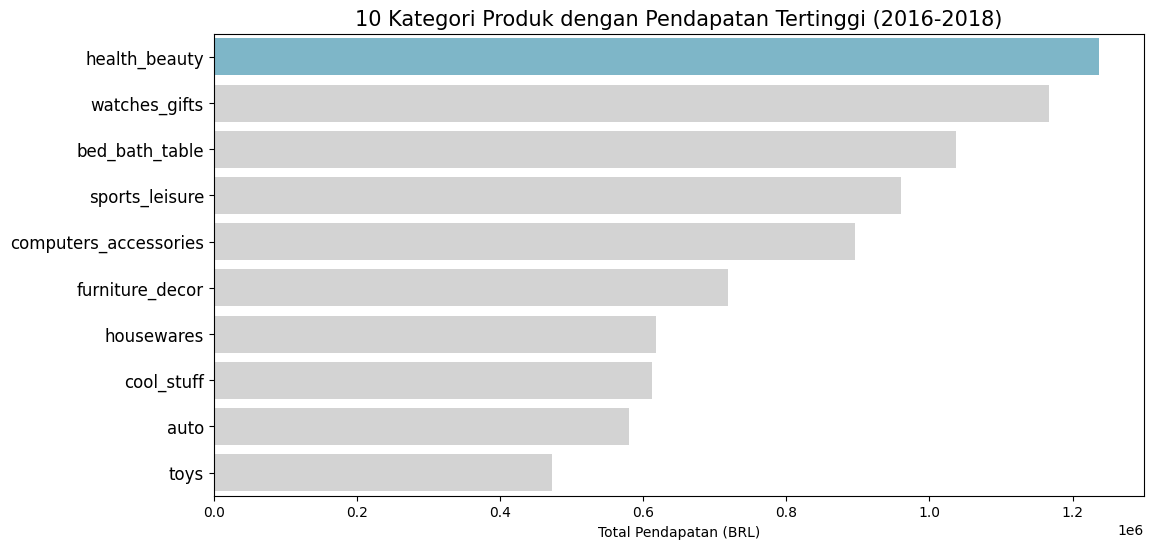

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan data 10 teratas
top_10_revenue = category_revenue_df.head(10)

plt.figure(figsize=(12, 6))
colors = ["#72BCD4"] + ["#D3D3D3"] * 9 # Highlight hanya peringkat pertama

sns.barplot(
    x="total_revenue",
    y="product_category_name_english",
    data=top_10_revenue,
    palette=colors
)

plt.title("10 Kategori Produk dengan Pendapatan Tertinggi (2016-2018)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Total Pendapatan (BRL)")
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 2:

/tmp/ipython-input-1616955207.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=low_rated_2018, palette="Reds_r", ax=ax[1])


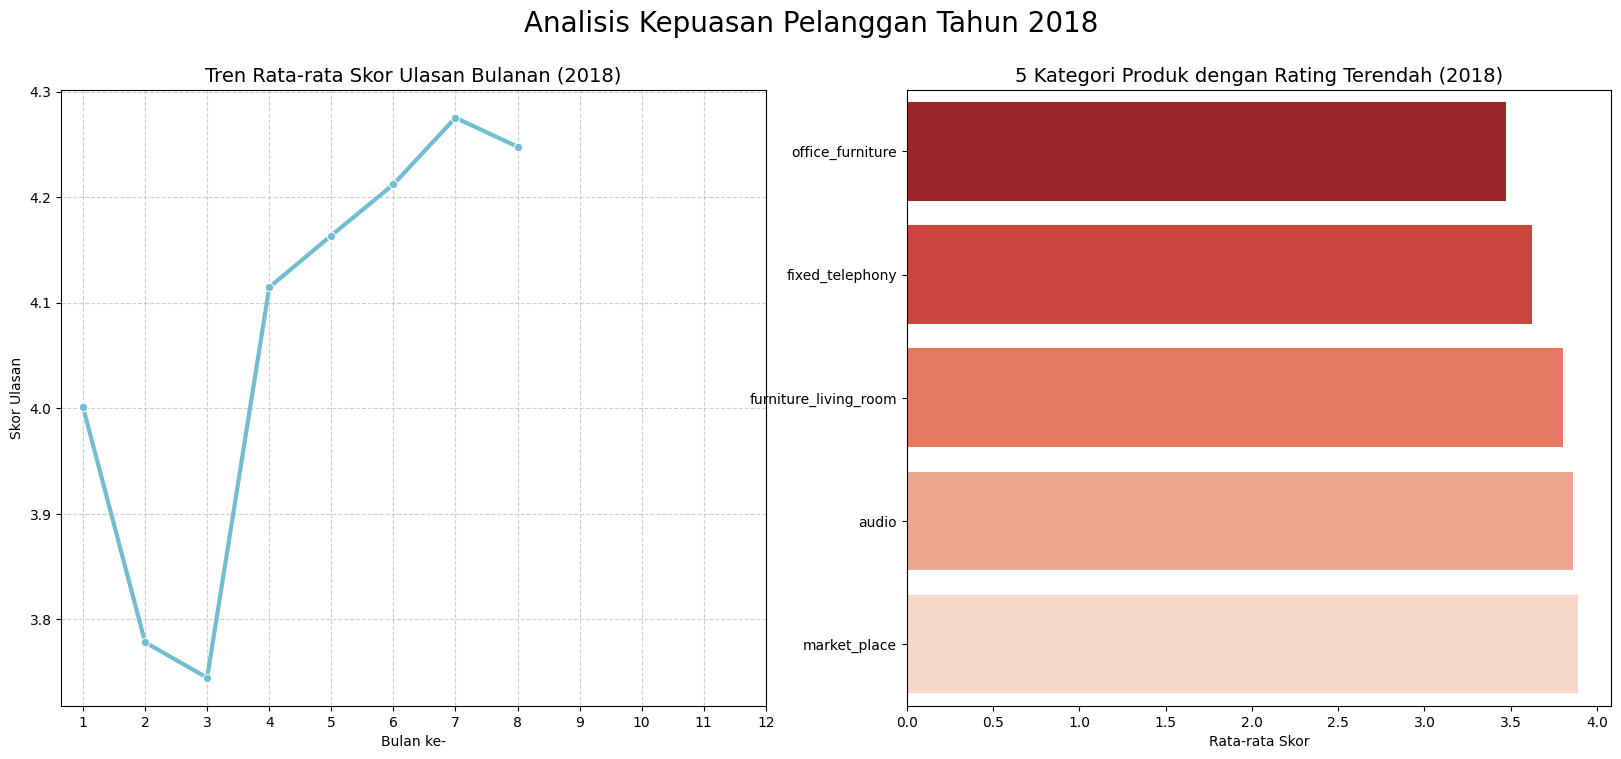

In [ ]:
# Filter data khusus tahun 2018
main_df_2018 = main_df[main_df['order_purchase_timestamp'].dt.year == 2018].copy()

# A. Data Tren Rating Bulanan
main_df_2018['month'] = main_df_2018['order_purchase_timestamp'].dt.month
monthly_rating = main_df_2018.groupby('month')['review_score'].mean().reset_index()

# B. Data Kategori Rating Terendah (Min. 50 order agar valid)
low_rated_2018 = main_df_2018.groupby("product_category_name_english").agg({
    "review_score": "mean",
    "order_id": "nunique"
}).query("order_id > 50").sort_values("review_score").head(5).reset_index()

# Membuat Visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Grafik Kiri: Tren Bulanan
sns.lineplot(x="month", y="review_score", data=monthly_rating, marker='o', linewidth=3, color="#72BCD4", ax=ax[0])
ax[0].set_title("Tren Rata-rata Skor Ulasan Bulanan (2018)", fontsize=14)
ax[0].set_xlabel("Bulan ke-")
ax[0].set_ylabel("Skor Ulasan")
ax[0].set_xticks(range(1, 13))
ax[0].grid(True, linestyle='--', alpha=0.6)

# Grafik Kanan: Rating Terendah
sns.barplot(x="review_score", y="product_category_name_english", data=low_rated_2018, palette="Reds_r", ax=ax[1])
ax[1].set_title("5 Kategori Produk dengan Rating Terendah (2018)", fontsize=14)
ax[1].set_xlabel("Rata-rata Skor")
ax[1].set_ylabel(None)

plt.suptitle("Analisis Kepuasan Pelanggan Tahun 2018", fontsize=20)
plt.show()

**Insight:**
- Berdasarkan grafik tersebut, kategori health_beauty menempati posisi teratas sebagai penyumbang pendapatan terbesar bagi perusahaan, disusul oleh watches_gifts dan bed_bath_table. Visualisasi ini menunjukkan adanya perbedaan yang cukup mencolok antara kategori peringkat pertama dan kedua dibandingkan dengan kategori lainnya. Temuan ini mengindikasikan bahwa produk kecantikan dan kesehatan menjadi penggerak utama aktivitas ekonomi pada platform e-commerce ini selama periode 2016-2018.
- Pada grafik tren bulanan, terlihat bahwa tingkat kepuasan pelanggan di tahun 2018 mengalami fluktuasi, dengan nilai terendah terjadi di awal tahun dan cenderung membaik memasuki pertengahan tahun. Sementara itu, pada grafik batang yang menampilkan kategori dengan rating terendah, office_furniture dan fixed_telephony tercatat memiliki skor ulasan paling rendah dibandingkan kategori lainnya (dengan jumlah transaksi minimal 50). Hal ini mengindikasikan adanya permasalahan spesifik pada kedua kategori tersebut, baik terkait kualitas produk yang diterima pelanggan maupun ekspektasi terhadap waktu pengiriman.

### Additional Insight:

/tmp/ipython-input-1681030682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


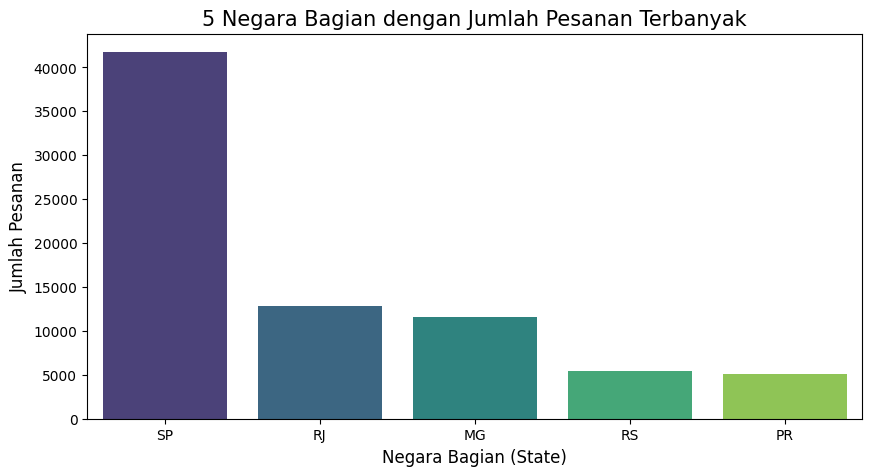

In [9]:
# --- Visualisasi Top 5 Negara Bagian (Geografi) ---
plt.figure(figsize=(10, 5))
sns.barplot(
    x=state_orders.index,
    y=state_orders.values,
    palette="viridis"
)
plt.title("5 Negara Bagian dengan Jumlah Pesanan Terbanyak", fontsize=15)
plt.xlabel("Negara Bagian (State)", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.show()

**Insight:**
- Negara bagian SP (São Paulo) tercatat sebagai wilayah dengan jumlah pesanan tertinggi, mencapai 41.746 pesanan, dan hampir empat kali lipat dibandingkan posisi kedua, yaitu RJ (Rio de Janeiro). Hal ini menunjukkan bahwa aktivitas pasar Olist sangat terkonsentrasi di wilayah SP. Oleh karena itu, fokus strategi di wilayah ini sebaiknya diarahkan pada upaya mempertahankan pasar yang sudah terbentuk, seperti menjaga efisiensi logistik, ketersediaan stok, serta mendorong pembelian ulang melalui promosi yang bersifat ringan dan terukur (misalnya voucher pelanggan aktif atau gratis ongkir terbatas), bukan promosi agresif yang berisiko menekan margin. Sementara itu, wilayah dengan volume pesanan yang lebih rendah dapat dijadikan target promosi yang lebih agresif untuk mendorong akuisisi pelanggan baru dan memperluas jangkauan pasar, sehingga pertumbuhan tidak hanya bertumpu pada satu wilayah saja.

## Analisis Lanjutan (Opsional)

In [ ]:
# Membuat dataframe RFM
rfm_df = main_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # Mengambil tanggal transaksi terakhir
    "order_id": "nunique",             # Menghitung jumlah order
    "price": "sum"                     # Menghitung total revenue
})

# Menamai kolom
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung kapan terakhir pelanggan bertransaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = main_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Menampilkan hasil RFM
print("Top 5 Customers berdasarkan RFM:")
display(rfm_df.head())

Top 5 Customers berdasarkan RFM:


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


**Insight:** Berdasarkan tabel RFM di atas, terlihat bahwa setiap pelanggan memiliki karakteristik transaksi yang berbeda. Sebagai contoh, pelanggan dengan ID 000379c… memiliki nilai Recency yang relatif rendah, yaitu 149 hari, serta nilai Monetary sebesar 93.00. Kondisi ini menunjukkan potensi loyalitas yang lebih baik jika dibandingkan dengan pelanggan yang sudah tidak melakukan transaksi selama lebih dari 500 hari.
Namun, secara umum nilai Frequency pada sampel data ini masih berada di angka 1, yang mengindikasikan bahwa sebagian besar pelanggan baru melakukan satu kali transaksi. Temuan ini menunjukkan adanya peluang bagi tim pemasaran untuk merancang strategi promosi dan penawaran diskon yang lebih menarik guna mendorong terjadinya pembelian ulang (repeat order).

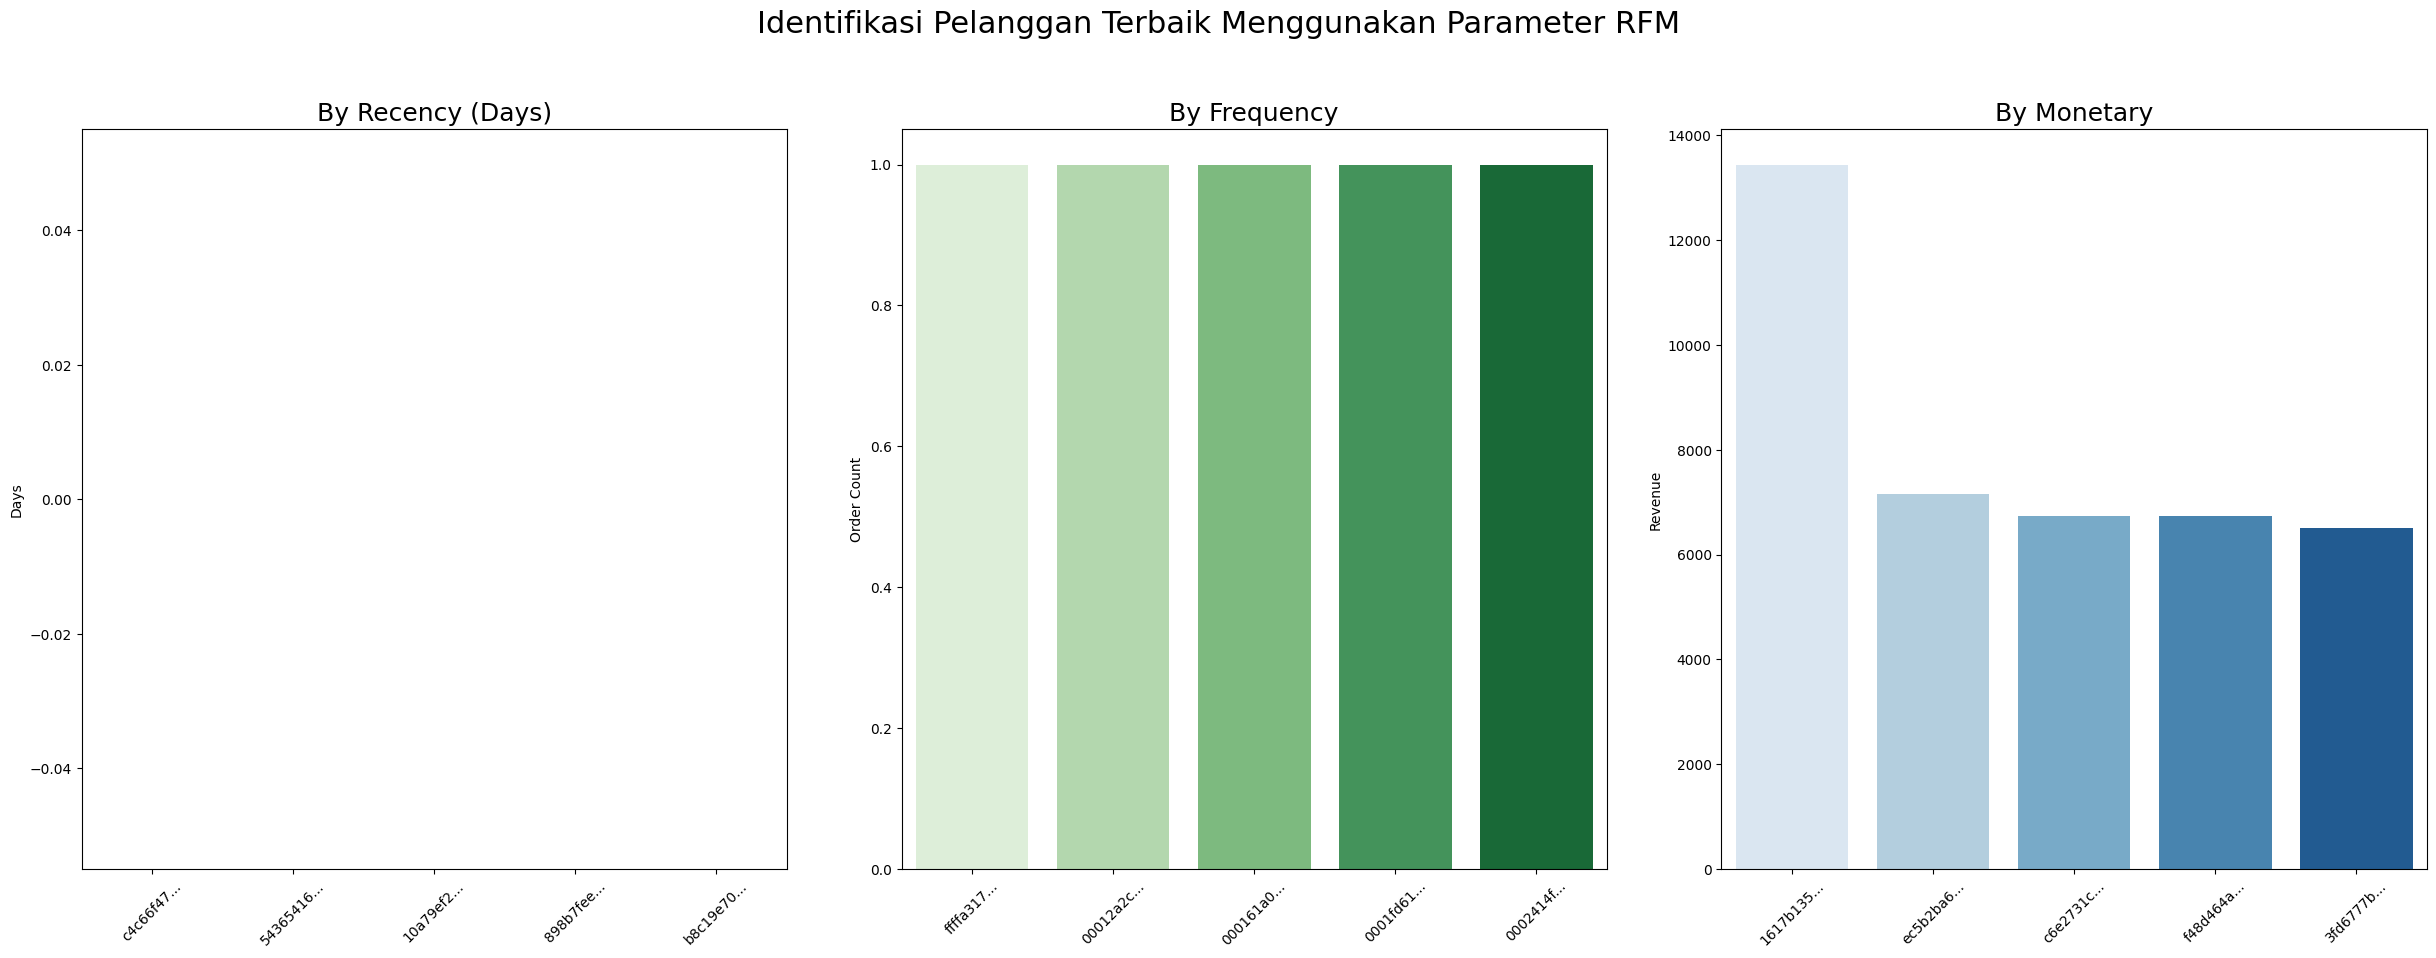

In [ ]:
# Menyiapkan data dan memotong ID agar tidak terlalu panjang
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5).copy()
top_recency["customer_id_short"] = top_recency["customer_id"].str[:8] + "..."

top_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5).copy()
top_frequency["customer_id_short"] = top_frequency["customer_id"].str[:8] + "..."

top_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5).copy()
top_monetary["customer_id_short"] = top_monetary["customer_id"].str[:8] + "..."

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

# 1. By Recency (Kita beri warna merah untuk menunjukkan ini 'terbaru')
sns.barplot(y="recency", x="customer_id_short", data=top_recency, palette="Reds", hue="customer_id_short", legend=False, ax=ax[0])
ax[0].set_ylabel("Days")
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (Days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', rotation=45)

# 2. By Frequency (Kita beri warna hijau)
sns.barplot(y="frequency", x="customer_id_short", data=top_frequency, palette="Greens", hue="customer_id_short", legend=False, ax=ax[1])
ax[1].set_ylabel("Order Count")
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=45)

# 3. By Monetary (Kita beri warna biru)
sns.barplot(y="monetary", x="customer_id_short", data=top_monetary, palette="Blues", hue="customer_id_short", legend=False, ax=ax[2])
ax[2].set_ylabel("Revenue")
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=45)

plt.suptitle("Identifikasi Pelanggan Terbaik Menggunakan Parameter RFM", fontsize=22)
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# Menampilkan Ringkasan Statistik RFM untuk meyakinkan data
print("=== Top 5 Customers by Recency ===")
print(top_recency[['customer_id', 'recency']].reset_index(drop=True))

print("\n=== Top 5 Customers by Frequency ===")
print(top_frequency[['customer_id', 'frequency']].reset_index(drop=True))

print("\n=== Top 5 Customers by Monetary ===")
print(top_monetary[['customer_id', 'monetary']].reset_index(drop=True))

=== Top 5 Customers by Recency ===
                        customer_id  recency
0  c4c66f47534e09a03fc7a878a9eda5ea        0
1  54365416b7ef5599f54a6c7821d5d290        0
2  10a79ef2783cae3d8d678e85fde235ac        0
3  898b7fee99c4e42170ab69ba59be0a8b        0
4  b8c19e70d00f6927388e4f31c923d785        0

=== Top 5 Customers by Frequency ===
                        customer_id  frequency
0  ffffa3172527f765de70084a7e53aae8          1
1  00012a2ce6f8dcda20d059ce98491703          1
2  000161a058600d5901f007fab4c27140          1
3  0001fd6190edaaf884bcaf3d49edf079          1
4  0002414f95344307404f0ace7a26f1d5          1

=== Top 5 Customers by Monetary ===
                        customer_id  monetary
0  1617b1357756262bfa56ab541c47bc16   13440.0
1  ec5b2ba62e574342386871631fafd3fc    7160.0
2  c6e2731c5b391845f6800c97401a43a9    6735.0
3  f48d464a0baaea338cb25f816991ab1f    6729.0
4  3fd6777bbce08a352fddd04e4a7cc8f6    6499.0


- **Recency (0 Hari)**: Lima pelanggan teratas memiliki nilai Recency sebesar 0, yang berarti mereka melakukan transaksi tepat pada hari terakhir periode pencatatan data. Kondisi ini menjelaskan mengapa grafik batang tidak terlihat, karena seluruh nilainya berada di angka nol.

- **Frequency (Semua 1)**: Data menunjukkan bahwa bahkan pelanggan dengan peringkat tertinggi pun baru melakukan satu kali transaksi. Ini menjadi insight bisnis yang cukup penting, yaitu platform sudah cukup kuat dalam menarik pelanggan untuk mencoba berbelanja, tetapi masih lemah dalam mendorong pelanggan untuk kembali bertransaksi.

- **Monetary (perbedaan yang cukup mencolok)**: Terdapat perbedaan nilai pengeluaran yang signifikan antar pelanggan teratas, di mana pelanggan peringkat pertama membelanjakan hingga 13.440 BRL, sementara pelanggan peringkat kelima sebesar 6.499 BRL. Oleh karena itu, strategi pemasaran dapat difokuskan pada perlakuan khusus bagi pelanggan dengan pengeluaran tinggi, misalnya melalui pendekatan VIP atau penawaran eksklusif.

## Conclusion

- **Conclusion - Pertanyaan 1**:
Berdasarkan hasil analisis, sepuluh kategori produk dengan total pendapatan (revenue) tertinggi selama periode 2016-2018 didominasi oleh kategori health_beauty, watches_gifts, dan bed_bath_table. Kategori health_beauty menempati posisi teratas sebagai kontributor utama pendapatan perusahaan. Temuan ini menunjukkan bahwa produk kesehatan dan kecantikan memiliki permintaan pasar yang kuat serta nilai transaksi yang relatif tinggi. Oleh karena itu, perusahaan disarankan untuk memprioritaskan ketersediaan stok dan memperkuat strategi pemasaran pada kategori-kategori unggulan tersebut.

- **Conclusion - Pertanyaan 2**:
Hasil analisis pada tahun 2018 menunjukkan bahwa tren rata-rata skor ulasan bulanan pelanggan relatif stabil pada level yang cukup baik, yaitu di atas 4.0, meskipun terdapat fluktuasi pada beberapa bulan tertentu. Namun, kategori office_furniture tercatat sebagai kategori dengan rata-rata rating terendah pada tahun tersebut. Temuan ini mengindikasikan perlunya evaluasi lebih lanjut, baik dari sisi kualitas produk maupun proses pengiriman, khususnya pada kategori furnitur kantor, guna meningkatkan kepuasan pelanggan dan mengurangi potensi ulasan negatif di masa mendatang.

In [11]:
# 1. Gabungkan item pesanan dengan detail produk
main_df = pd.merge(order_items_df, products_df, on="product_id", how="left")

# 2. Tambahkan terjemahan kategori
main_df = pd.merge(main_df, product_category_df, on="product_category_name", how="left")

# 3. Tambahkan data pesanan (untuk mendapatkan customer_id)
main_df = pd.merge(main_df, orders_df, on="order_id", how="left")

# 4. TERAKHIR: Tambahkan data pelanggan (untuk mendapatkan customer_state)
main_df = pd.merge(main_df, customers_df, on="customer_id", how="left")

# Simpan ulang file ke folder dashboard
main_df.to_csv("dashboard/main_data.csv", index=False)

print("Berhasil! Sekarang kolom 'customer_state' sudah ada di main_data.csv")

Berhasil! Sekarang kolom 'customer_state' sudah ada di main_data.csv
